In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_hdf('tng300-sam.h5')

In [3]:
df = df[np.logical_and(df['GalpropMstar'] > 1.e9,df['GalpropSatType']==0)]
df.reset_index(drop=True)
df.shape
               

(273765, 56)

In [4]:
df['rdisk0D'] = df['GalpropRdisk']/df['GalpropRhalo']
df['fdisk'] = (df['GalpropMdisk']+df['GalpropMcold'])/df['HalopropMvir']
bad = np.logical_and(df['rdisk0D']>0.019999,df['rdisk0D']<0.0200001)
bad.count()-bad.sum()

183674

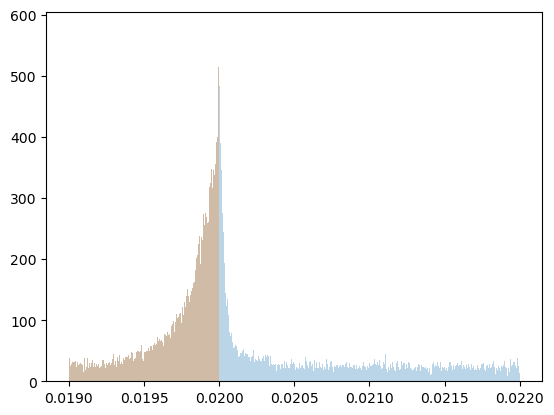

In [5]:
plt.hist(df['fdisk'],bins=1000,range=[0.019,0.022],alpha=0.3)
#plt.hist(df['GalpropMcold']/df['HalopropMvir'],bins=1000,range=[0,0.1],alpha=0.3)
#plt.hist(df['GalpropMdisk']/df['HalopropMvir'],bins=1000,range=[0,0.1],alpha=0.3)
plt.hist(df['fdisk'][bad],bins=1000,range=[0.019,0.022],alpha=0.3)
plt.show()

In [6]:
bad = np.logical_and(df['rdisk0D']>0.019999,df['rdisk0D']<0.0200001)
bad.count()-bad.sum()

183674

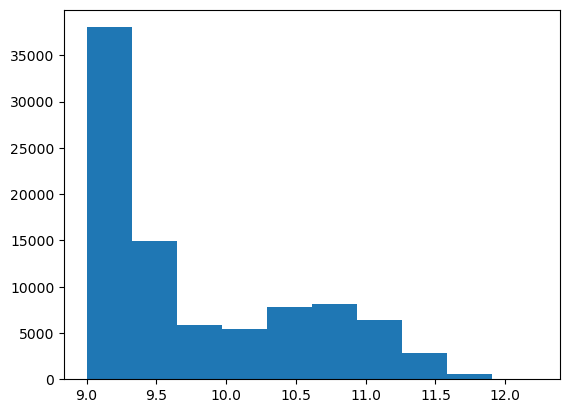

In [7]:
plt.hist(np.log10(df['GalpropMstar'][bad]))
plt.show()

In [8]:
good = df['fdisk'] > 0.0205
print(good.sum(),good.count())

172644 273765


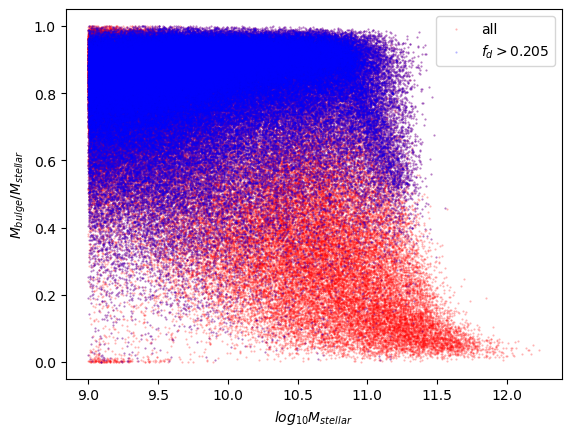

In [9]:
plt.scatter(np.log10(df['GalpropMstar']),df['GalpropMdisk']/df['GalpropMstar'], s=1,color='red', marker='.',alpha=0.3, label='all')
plt.scatter(np.log10(df['GalpropMstar'][good]),df['GalpropMdisk'][good]/df['GalpropMstar'][good], color='blue', s=1, marker='.',alpha=0.3,label='$f_d > 0.205$')
plt.xlabel(r'$log_{10} M_{stellar}$')
plt.ylabel(r'$M_{bulge} / M_{stellar}$')
plt.legend()
plt.savefig('bulgefrac.png')

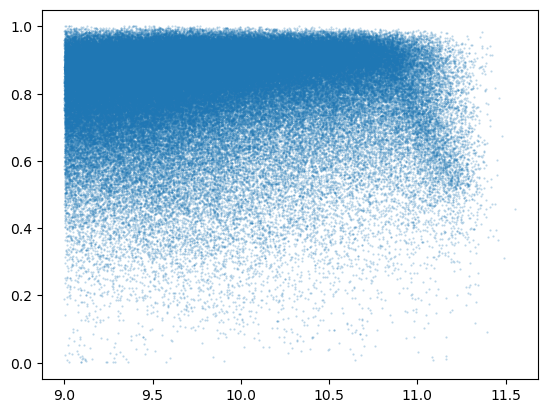

In [10]:
plt.scatter(np.log10(df['GalpropMstar'][good]),df['GalpropMdisk'][good]/df['GalpropMstar'][good], s=1, marker='.',alpha=0.3)

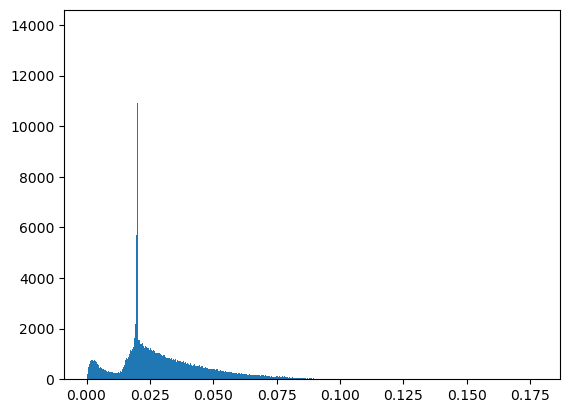

In [15]:
ans = plt.hist(df['fdisk'],bins=1000)

In [26]:
mbin1 = df['GalpropMvir'] < 1e11
mbin2 = np.logical_and(df['GalpropMvir'] > 1.e11,df['GalpropMvir'] < 5.e11)
mbin3 = np.logical_and(df['GalpropMvir'] > 5.e11,df['GalpropMvir'] < 1.e12)
mbin4 = df['GalpropMvir'] > 1.e12
print(mbin1.sum(),mbin2.sum(),mbin3.sum(),mbin4.sum())

6896 166228 46677 53947


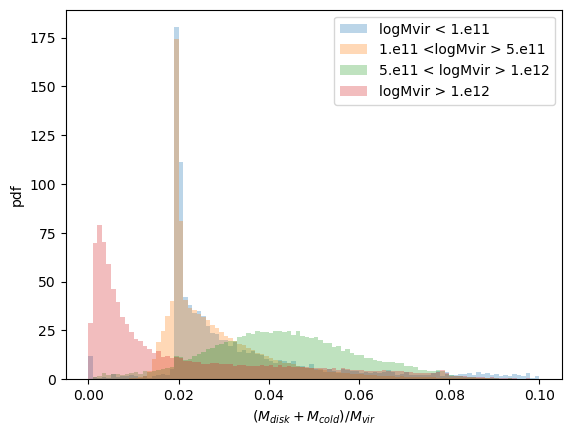

In [32]:
ans1 = plt.hist(df['fdisk'][mbin1],bins=100,density=True,alpha=0.3,range=[0,0.1],label='logMvir < 1.e11')
ans3 = plt.hist(df['fdisk'][mbin2],bins=100,density=True,alpha=0.3,range=[0,0.1],label='1.e11 <logMvir > 5.e11')
ans4 = plt.hist(df['fdisk'][mbin3],bins=100,density=True,alpha=0.3,range=[0,0.1],label='5.e11 < logMvir > 1.e12')
ans5 = plt.hist(df['fdisk'][mbin4],bins=100,density=True,alpha=0.3,range=[0,0.1],label='logMvir > 1.e12')
plt.legend()
plt.ylabel('pdf')
plt.xlabel('$(M_{disk}+M_{cold})/M_{vir}$')
plt.savefig('fdisk.pdf')